In [32]:
import numpy as np
import random
import matplotlib.pyplot as plt

np.random.seed(42)
random.seed(42)

import pandas as pd
from preprocessing import prepare_data, prepare_data_neural_only
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [33]:
# Load data
X_train, X_test, y_train, y_test, feature_cols, scaler = prepare_data_neural_only()

# Classic Logistic (linear kernel)

In [34]:
# Train Logistic with C = 1
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [35]:
# Predictions
y_pred = log_reg.predict(X_test)

In [36]:
# Evaluation
print(classification_report(y_test, y_pred, target_names=['Incorrect', 'Correct']))

              precision    recall  f1-score   support

   Incorrect       0.50      0.09      0.15        11
     Correct       0.74      0.97      0.84        29

    accuracy                           0.72        40
   macro avg       0.62      0.53      0.49        40
weighted avg       0.67      0.72      0.65        40



In [37]:
cm = confusion_matrix(y_test, y_pred)
print(f"  True Negatives: {cm[0,0]}")
print(f"  False Positives: {cm[0,1]}")
print(f"  False Negatives: {cm[1,0]}")
print(f"  True Positives: {cm[1,1]}")

  True Negatives: 1
  False Positives: 10
  False Negatives: 1
  True Positives: 28


In [38]:
train_acc = log_reg.score(X_train, y_train)
test_acc = log_reg.score(X_test, y_test)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)

print(f"Training Accuracy: {train_acc:.2%}")
print(f"Test Accuracy: {test_acc:.2%}")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2%} (± {cv_scores.std():.2%})")
print(f"Overfitting Check: {train_acc - test_acc:+.2%}")

Training Accuracy: 70.00%
Test Accuracy: 72.50%
Cross-Validation Accuracy: 69.38% (± 5.38%)
Overfitting Check: -2.50%


C=  0.001: Train=72.50%, Test=72.50%, CV=72.50% (±1.25%)
C=  0.010: Train=72.50%, Test=72.50%, CV=72.50% (±1.25%)
C=  0.100: Train=72.50%, Test=70.00%, CV=72.50% (±2.34%)
C=  0.500: Train=70.00%, Test=72.50%, CV=69.38% (±4.15%)
C=  1.000: Train=70.00%, Test=72.50%, CV=69.38% (±5.38%)
C=  2.000: Train=69.38%, Test=72.50%, CV=69.38% (±5.38%)
C=  5.000: Train=69.38%, Test=70.00%, CV=69.38% (±5.38%)
C= 10.000: Train=68.75%, Test=70.00%, CV=69.38% (±5.38%)
C= 20.000: Train=68.75%, Test=70.00%, CV=69.38% (±5.38%)
C= 50.000: Train=68.75%, Test=70.00%, CV=69.38% (±5.38%)
C=100.000: Train=68.75%, Test=70.00%, CV=69.38% (±5.38%)

 Best C for All Features: 0.001 with CV score: 0.7250


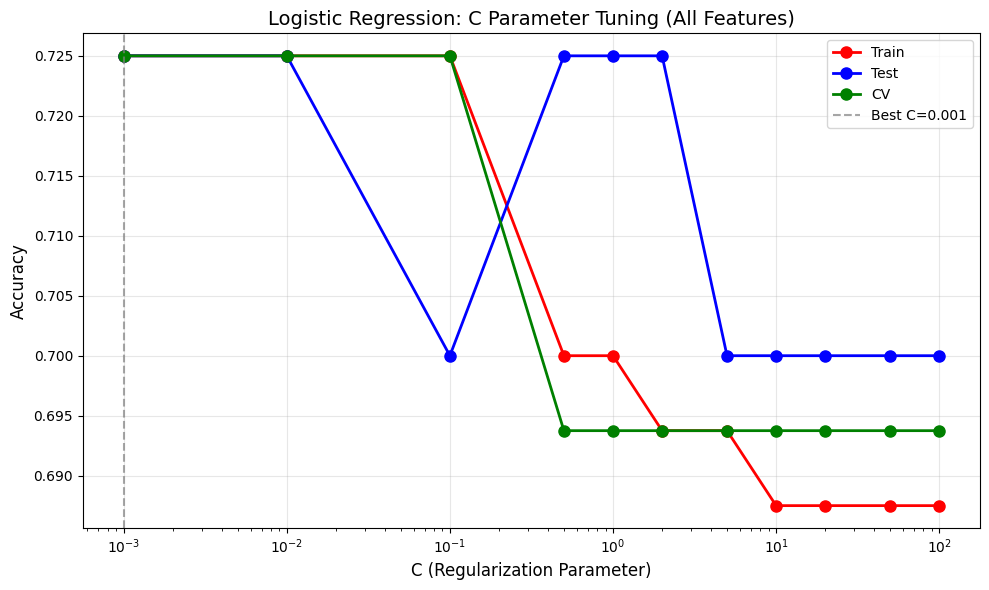

In [ ]:
# Test different C values
C_values = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0]
train_scores = []
test_scores = []
cv_scores = []

for C in C_values:
    log_reg = LogisticRegression(C=C, random_state=42, max_iter=1000, class_weight='balanced')
    log_reg.fit(X_train, y_train)
    
    train_acc = log_reg.score(X_train, y_train)
    test_acc = log_reg.score(X_test, y_test)
    cv_score = cross_val_score(log_reg, X_train, y_train, cv=5)
    
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    cv_scores.append(cv_score.mean())
    
    print(f"C={C:7.3f}: Train={train_acc:.2%}, Test={test_acc:.2%}, CV={cv_score.mean():.2%} (±{cv_score.std():.2%})")

best_C_idx = np.argmax(cv_scores)
best_C = C_values[best_C_idx]
print(f"\n Best C for All Features: {best_C} with CV score: {cv_scores[best_C_idx]:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, 'o-', color='red', label='Train', linewidth=2, markersize=8)
plt.plot(C_values, test_scores, 'o-', color='blue', label='Test', linewidth=2, markersize=8)
plt.plot(C_values, cv_scores, 'o-', color='green', label='CV', linewidth=2, markersize=8)
plt.axvline(x=best_C, color='gray', linestyle='--', alpha=0.7, label=f'Best C={best_C}')
plt.xlabel('C (Regularization Parameter)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Logistic Regression: C Parameter Tuning (All Features)', fontsize=14)
plt.xscale('log')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()